**Classification tests**

In [83]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
from autograd import grad
import classes
import functions
import importlib
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

importlib.reload(classes) 
importlib.reload(functions)

import seaborn as sns


def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)
print(X_train.shape[0])


56000


Doing the same analysis for classification, as for regression; tweaking based on epochs and etas for each optimizer, batched and fullbatch. Starting with Plain GD (SGD Fullbatch), using only one hidden layer with reLU as activation in hidden layers. 

In [103]:
epochs = [5,10,15,20,30]
etas = [1e-4, 1e-3, 1e-2, 1e-1,2e-1]

acc = np.empty((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [reLU, softmax], [ReLU_der, softmax_der], cross_entropy, cross_entropy_der)
        ClassifierPlain.train_SGD(X_train, Y_train, epochs=epoch, batch_size=X_train.shape[0], learning_rate=eta, functional=NN_ADAM)
        pred = ClassifierPlain.feed_forward(X_test)
        y_pred_label = np.argmax(pred, axis=1)
        accuracy = round(np.mean(y_test == y_pred_label),4)
        acc[i,e] = accuracy
        print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {acc[i,e]}")


Accuracy for 5 epochs and learning rate 0.0001, with accuracy: 0.1454
Accuracy for 5 epochs and learning rate 0.001, with accuracy: 0.0686
Accuracy for 5 epochs and learning rate 0.01, with accuracy: 0.2074
Accuracy for 5 epochs and learning rate 0.1, with accuracy: 0.4694
Accuracy for 5 epochs and learning rate 0.2, with accuracy: 0.4511
Accuracy for 10 epochs and learning rate 0.0001, with accuracy: 0.1161
Accuracy for 10 epochs and learning rate 0.001, with accuracy: 0.1309
Accuracy for 10 epochs and learning rate 0.01, with accuracy: 0.4234
Accuracy for 10 epochs and learning rate 0.1, with accuracy: 0.5597
Accuracy for 10 epochs and learning rate 0.2, with accuracy: 0.3475
Accuracy for 15 epochs and learning rate 0.0001, with accuracy: 0.1336
Accuracy for 15 epochs and learning rate 0.001, with accuracy: 0.0902
Accuracy for 15 epochs and learning rate 0.01, with accuracy: 0.4453
Accuracy for 15 epochs and learning rate 0.1, with accuracy: 0.5164
Accuracy for 15 epochs and learning

C:\Users\Jogga\AppData\Local\Temp\ipykernel_82032\857414011.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


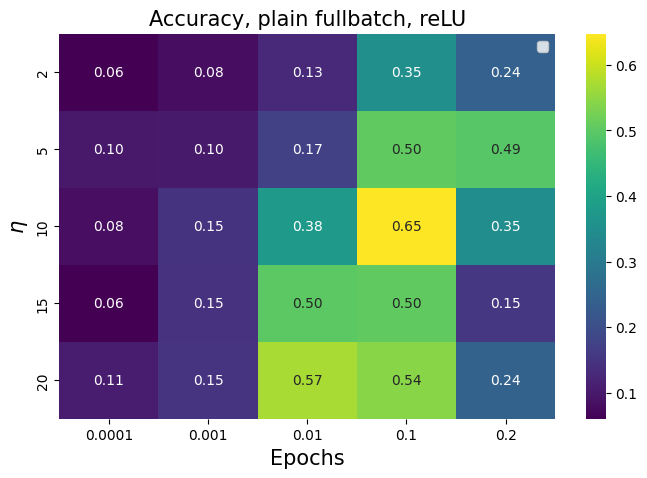

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel("Epochs", fontsize=15)
ax.set_ylabel(r"$\eta$", fontsize=15)
ax.set_title(r"Accuracy, ADAM fullbatch, reLU", fontsize=15)
ax.legend()

Testing for SGD_v2 with the same analysis

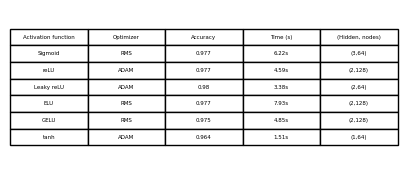

In [123]:
import pandas as pd

df = pd.DataFrame({
    "Activation function": ["Sigmoid", "reLU", "Leaky reLU", "ELU", "GELU", "tanh"],
    "Optimizer": ["RMS", "ADAM", "ADAM", "RMS", "RMS", "ADAM"],
    "Accuracy": ["0.977","0.977", "0.98", "0.977", "0.975", "0.964"],
    "Time (s)": ["6.22s", "4.59s", "3.38s", "7.93s", "4.85s", "1.51s"],
    "(Hidden, nodes)": ["(3,64)", "(2,128)", "(2,64)", "(2,128)", "(2,128)", "(1,64)"]
})

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 2))
ax.axis("off")

# Create table
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 loc="center")

# Center all text horizontally and vertically
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center')
    cell.set_fontsize(52)

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")
save_path = os.path.join(save_dir, "Act_OPTClass.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

In [118]:

import seaborn as sns


def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m


mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

layers_list = [0,1, 2, 3]
etas = [1e-5,1e-4,1e-3,1e-2,1e-1]
nodes_list = [32,64,128,256]
acc = np.empty((len(layers_list), len(nodes_list)))
timeMatrix_ = np.empty(acc.shape)

for i, L in enumerate(layers_list):
    for j, N in enumerate(nodes_list):
        start = time.perf_counter()
        if L == 0:
            layers, acts, ders = [10], [softmax], [softmax_der]
        else:
            layers = [N]*L + [10]
            acts = [reLU]*L + [softmax]
            ders = [ReLU_der]*L + [softmax_der]

        Classifier = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
        Classifier.train_SGD_v2(X_train, Y_train, epochs=15, learning_rate=0.01, batch_size=128, functional=NN_RMS)
        predictions = Classifier.feed_forward(X_test)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_test == y_pred_label),4)
        acc[i,j] = accuracy
        end = time.perf_counter()
        time_iter = end - start
        timeMatrix_[i,j] = round(time_iter, 4)
        print(f"Accuracy for {L} layers and {N} nodes: {accuracy}, and time: {timeMatrix_[i,j]}s")



Accuracy for 0 layers and 32 nodes: 0.3524, and time: 2.6658s
Accuracy for 0 layers and 64 nodes: 0.3495, and time: 2.6483s
Accuracy for 0 layers and 128 nodes: 0.2467, and time: 2.681s
Accuracy for 0 layers and 256 nodes: 0.3389, and time: 2.6277s
Accuracy for 1 layers and 32 nodes: 0.3603, and time: 3.1459s
Accuracy for 1 layers and 64 nodes: 0.4982, and time: 3.4384s
Accuracy for 1 layers and 128 nodes: 0.6161, and time: 4.2s
Accuracy for 1 layers and 256 nodes: 0.6727, and time: 5.8149s
Accuracy for 2 layers and 32 nodes: 0.3759, and time: 3.4029s
Accuracy for 2 layers and 64 nodes: 0.4679, and time: 4.0301s
Accuracy for 2 layers and 128 nodes: 0.6307, and time: 5.3831s
Accuracy for 2 layers and 256 nodes: 0.7191, and time: 8.5682s
Accuracy for 3 layers and 32 nodes: 0.2532, and time: 3.8554s
Accuracy for 3 layers and 64 nodes: 0.4721, and time: 4.7377s
Accuracy for 3 layers and 128 nodes: 0.6092, and time: 6.5705s
Accuracy for 3 layers and 256 nodes: 0.6601, and time: 10.9545s


Text(0.5, 1.0, 'Time as function of depth and nodes')

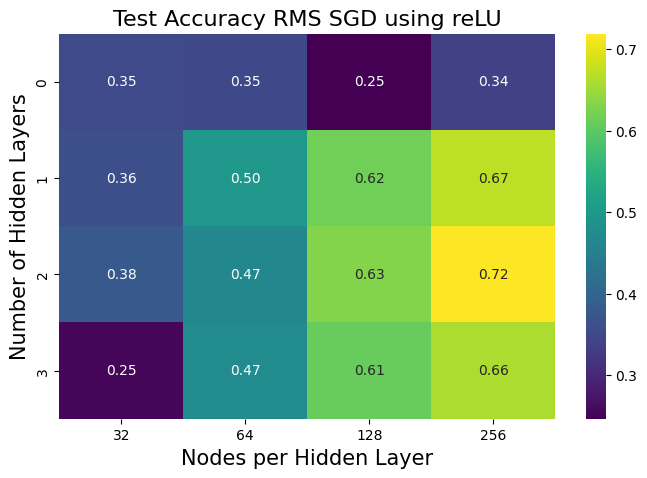

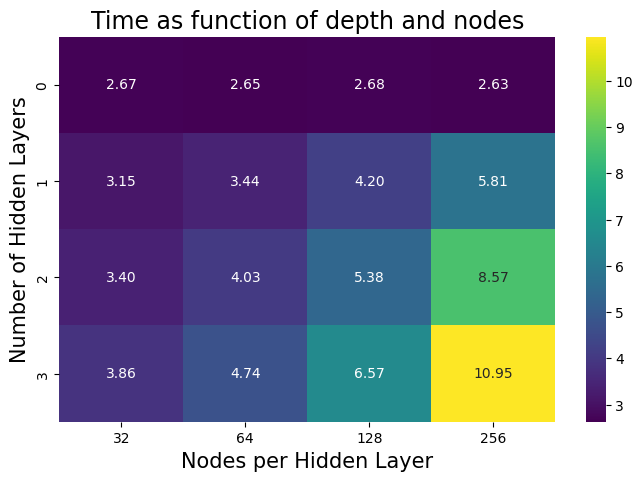

In [119]:
import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=layers_list)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Test Accuracy RMS SGD using reLU", fontsize=16)

# save_path = os.path.join(save_dir, "HM_acc_f_ADAM.png")
# fig.savefig(save_path, dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix_, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=layers_list)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Time as function of depth and nodes", fontsize=17)

Plotting time as function of complexity (Big-O)

[0.         0.3592944  1.         0.98787635]


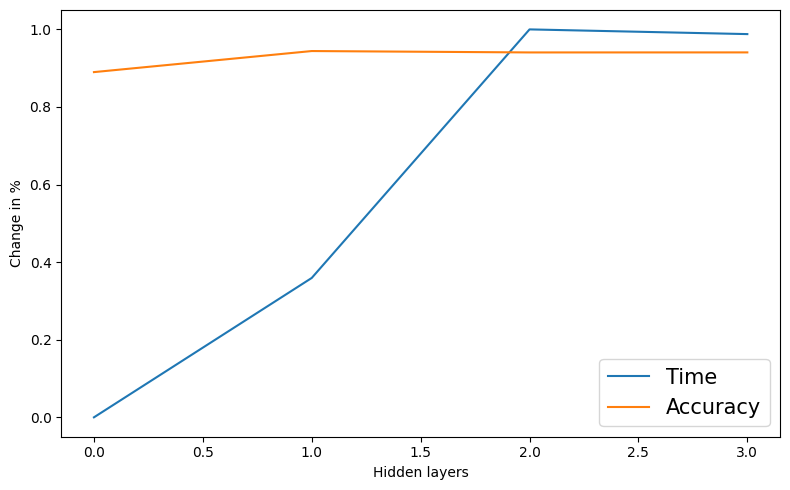

In [ ]:
from matplotlib.ticker import Formatter

fig, ax = plt.subplots(figsize=(8, 5))
time_col = timeMatrix_[:,3]
time_norm = (time_col - time_col.min()) / (time_col.max() - time_col.min())
print(time_norm)
ax.plot(layers_list,time_norm, label="Time")
ax.set_xlabel("Hidden layers")
ax.set_ylabel("Change in %")
ax.plot(layers_list,acc[:,3], label="Accuracy")
#ax.set_yscale('log')  
ax.legend(fontsize=15)
fig.tight_layout()


An attempt to make a confusion matrix

Iters:  6300


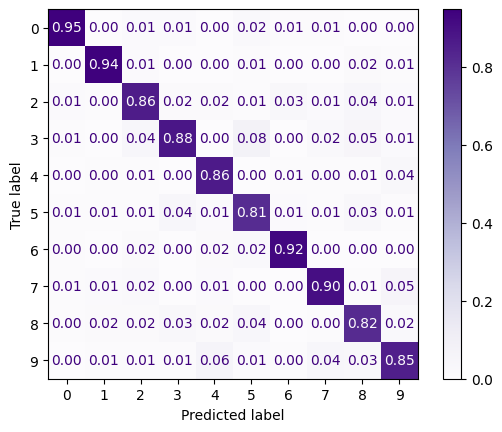

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Classifier = NeuralNetwork(X_train.shape[1], [50,10], [sigmoid ,softmax], [sigmoid_der, softmax_der], cross_entropy, cross_entropy_der)
Classifier.train_SGD(X_train, Y_train, epochs=10, learning_rate=0.1, batch_size=100)
predictions = Classifier.feed_forward(X_test)


y_true = np.asarray(y_test)
if y_true.ndim == 2:                      
    y_true = y_true.argmax(axis=1)


y_pred = np.asarray(predictions)
if y_pred.ndim == 2:                      
    y_pred = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred, normalize="pred")
ConfusionMatrixDisplay(cm).plot(cmap='Purples', values_format=".2f")
plt.show()


Comparing with ordinary logistic regression (no hidden layers)

In [ ]:
def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m


mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
Y_train, Y_test = onehot(y_train), onehot(y_test)

nodes_list = [5, 10, 25, 50]
activations = [reLU, sigmoid, leaky_reLU]
activation_ders = [ReLU_der, sigmoid_der, leaky_reLU_der]

for i in range(5):
    for j in range(5):
        if L == 0:
            layers, acts, ders = [10], [softmax], [softmax_der]
        layers, acts, ders = [10], [softmax], [softmax_der]

        Classifier = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=15, learning_rate=0.1, batch_size=4048, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_test)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_test == y_pred_label),4)
        acc[i,j] = accuracy
        print(f"Accuracy: {accuracy}")

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax)
ax.set_xlabel("", fontsize=15)
ax.set_ylabel("Iters", fontsize=15)
ax.set_title("Test Accuracy Heatmap", fontsize=17)

Accuracy: 0.8996


KeyboardInterrupt: 

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

np.random.seed(50)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

def GELU(x):
    return 0.5*x *(1+tanh(np.sqrt(2/np.pi)*(x+0.044715*(x**3)))) 
def ELU(x, alpha=0.01):
    return np.where(x < 0, alpha*(np.exp(x)-1), x)


def ELU_der(x, alpha=0.01):
    return np.where(x<0, ELU(x) + alpha, 1)


from scipy.special import erf
def GELU_der(x):
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-x**2 / 2)) / np.sqrt(2 * np.pi)

nodes_list = [8,16,32,64,128]
activations = [ELU, tanh, GELU, reLU, leaky_reLU]
activation_ders = [ELU_der, tanh_der, GELU_der, ReLU_der, leaky_reLU_der]
acc = np.zeros((len(activations), len(nodes_list)))
n_layers = 1
time_matrix = np.empty(acc.shape)

for a, A in enumerate(activations):
    for j, N in enumerate(nodes_list):
        start = time.perf_counter()
        ders = activation_ders[a]

        Classifier = NeuralNetwork(X_train.shape[1], [10], [A]*n_layers + [softmax], [ders]*n_layers + [softmax_der], cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=20, learning_rate=0.001, batch_size=32, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_train)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_train == y_pred_label),4)
        acc[a,j] = accuracy

        end = time.perf_counter()
        time_iter = end - start
        time_matrix[a,j] = time_iter

        print(f"Accuracy for {A.__name__} layers and {N} nodes: {accuracy}. Time: {round(time_iter,3)}")


Accuracy for ELU layers and 8 nodes: 0.8495. Time: 50.635
Accuracy for ELU layers and 16 nodes: 0.8453. Time: 13.744
Accuracy for ELU layers and 32 nodes: 0.8578. Time: 13.666
Accuracy for ELU layers and 64 nodes: 0.857. Time: 12.977
Accuracy for ELU layers and 128 nodes: 0.8518. Time: 13.235
Accuracy for tanh layers and 8 nodes: 0.8366. Time: 13.121
Accuracy for tanh layers and 16 nodes: 0.8275. Time: 12.75
Accuracy for tanh layers and 32 nodes: 0.8363. Time: 12.83
Accuracy for tanh layers and 64 nodes: 0.8301. Time: 12.616
Accuracy for tanh layers and 128 nodes: 0.8354. Time: 12.57
Accuracy for GELU layers and 8 nodes: 0.8387. Time: 13.883
Accuracy for GELU layers and 16 nodes: 0.8564. Time: 13.935
Accuracy for GELU layers and 32 nodes: 0.8599. Time: 13.593
Accuracy for GELU layers and 64 nodes: 0.8561. Time: 14.29
Accuracy for GELU layers and 128 nodes: 0.8582. Time: 13.834
Accuracy for reLU layers and 8 nodes: 0.84. Time: 15.022
Accuracy for reLU layers and 16 nodes: 0.8558. Time: 

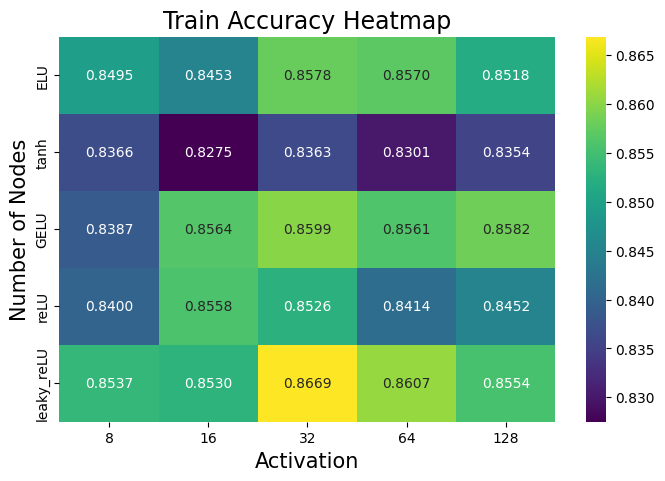

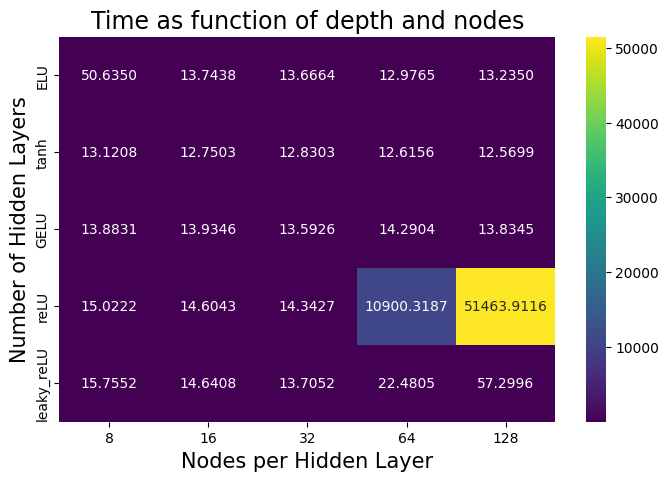

In [ ]:
import os

names = ["ELU", "tanh", "GELU", "reLU", "leaky_reLU"]

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".4f", cmap="viridis", ax=ax, yticklabels=names, xticklabels=nodes_list)
ax.set_xlabel(f"Activation", fontsize=15)
ax.set_ylabel("Number of Nodes", fontsize=15)
ax.set_title("Train Accuracy Heatmap", fontsize=17)

save_path = os.path.join(save_dir, "HM_f_acts_train.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(time_matrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, yticklabels=names, xticklabels=nodes_list)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Time as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_f_complexity.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

In [ ]:
def GELU(x):
    return 0.5*x *(1+tanh(np.sqrt(2/np.pi)*(x+0.044715*(x**3)))) 


from scipy.special import erf
def GELU_der(x):
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-x**2 / 2)) / np.sqrt(2 * np.pi)


print(GELU(0.5))
print(GELU_der(0.5))


0.34571400982514394
0.8674951246561627


In [ ]:
def ELU(x, alpha=0.01):
    return np.where(x < 0, alpha*(np.exp(x)-1), x)


def ELU_der(x, alpha=0.01):
    return np.where(x<0, ELU(x) + alpha, 1)

print(ELU(0.66))

0.66


In [ ]:
digits = datasets.load_digits()
data = digits.images
target = digits.target

n_inputs = len(data)
inputs = data.reshape(n_inputs, -1)

print(inputs.shape)

(1797, 64)
(70000, 784)


In [110]:
digits = datasets.load_digits()
data = digits.images
target = digits.target
n_inputs = len(data)
inputs = data.reshape(n_inputs, -1)

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

In [113]:
epochs = [200,500,2000]
etas = [1e-2, 1e-1, 2e-1, 5e-1]
bathes = [16,32,64,1280]

acc = np.empty((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        for b, batch in enumerate(bathes):
            start = time.perf_counter()
            ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [reLU, softmax], [ReLU_der, softmax_der], cross_entropy, cross_entropy_der)
            ClassifierPlain.train_SGD_v2(X_train, Y_train, epochs=epoch, batch_size=batch, learning_rate=eta, functional=NN_ADAM)
            pred = ClassifierPlain.feed_forward(X_test)
            y_pred_label = np.argmax(pred, axis=1)
            accuracy = round(np.mean(y_test == y_pred_label),4)
            end = time.perf_counter()
            time_iter = end - start
            #acc[i,e] = accuracy
            print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {accuracy}. Batchsize={batch}, with time {round(time_iter, 4)}")

Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.8389. Batchsize=16, with time 0.3851
Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.8611. Batchsize=32, with time 0.3861
Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.8833. Batchsize=64, with time 0.4802
Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.9306. Batchsize=1280, with time 0.9511
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.8167. Batchsize=16, with time 0.3766
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.6944. Batchsize=32, with time 0.3781
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.9222. Batchsize=64, with time 0.4139
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.925. Batchsize=1280, with time 0.989
Accuracy for 200 epochs and learning rate 0.2, with accuracy: 0.1111. Batchsize=16, with time 0.4449
Accuracy for 200 epochs and learning rate 0.2, with accuracy: 0.3139. Batchsize=32, w